---
Vendredi 9 - 12 - 2023
# P6-DS-OC | Classifier automatiquement des biens de consommation


<span style="color:#FFD700" font=10>**CONTEXT**</span>

 
Problem : peu d'efforts coté client sur l'upload des photos d'articles en vente entrainnant une mauvaise catégorisation des articles.

Mission : Faire une étude de faisabilité d'une automatisation de categorisation 

Objectif : faciliter la mise en ligne de nouveaux articles et la recherche de produits

</br>

<span style="color:#00FF00" font=10>**OUTILS**</span>

Un datasert d'articles contenant le nom de l'article, sa description et un lien de téléchargement de photo accompagné d'un notebook d’exemple d’étude de faisabilité.


</br>


<span style="color:#FF69B4" font=10>**TODO**</span>


Step 1 : Étude de faisabilité d'un model de catégorisation

1. Faire des analyses exploratoires sur les images ainsi que  les texts decrivant lmes articles.

2. Appliquer une reduction de dimension sur les images

3. Projecter sur un plan 2D pour analyser la possibilité de regrouper.

4. Définir d'évaluation pour confirmer les résultats.

---


## Data Preparation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import os
from src.pipelines.data_preprocessing import DataProcessor

import logging
from datetime import datetime
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


---
### Data Preprocessing
---

In [2]:

# Initialize the data processor class to preprocess the data
preprocess = DataProcessor()


"2024-01-14 08:46:20,919 - Preprocessing - INFO - ========== Initializing =========="
"2024-01-14 08:46:20,922 - Preprocessing - INFO - Data directory is loaded !!!"
"2024-01-14 08:46:20,923 - Preprocessing - INFO - Outputs directory is loaded !!!"


/Users/alhassanneahmedap59_cb/git/p6-ds/notebooks


"2024-01-14 08:46:21,737 - Preprocessing - INFO - Spacy model en_core_web_sm is loaded !!!"


#### Read Data

In [7]:
df = preprocess.get_data()
df.head()


,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


In [8]:
df.dtypes.value_counts()


object     12
float64     2
bool        1
Name: count, dtype: int64

In [9]:
df.describe(include=object)


,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,image,description,product_rating,overall_rating,brand,product_specifications
count,1050,1050,1050,1050,1050,1050,1050,1050,1050,1050,712,1049
unique,1050,149,1050,1050,642,1050,1050,1050,27,27,490,984
top,55b85ea15a1536d46b7190ad6fff8ce7,2015-12-01 12:40:44 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Bed Linen >> Blankets, Qu...",CRNEG7BKMFFYHQ8Z,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,PRINT SHAPES,"{""product_specification""=>[{""key""=>""Type"", ""va..."
freq,1,150,1,1,56,1,1,1,889,889,11,22


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [11]:
df.nunique()


uniq_id                    1050
crawl_timestamp             149
product_url                1050
product_name               1050
product_category_tree       642
pid                        1050
retail_price                354
discounted_price            424
image                      1050
is_FK_Advantage_product       2
description                1050
product_rating               27
overall_rating               27
brand                       490
product_specifications      984
dtype: int64

#### Feature engineeering - 1

In [12]:
# Compute len description
tmp = df.description.str.len()

# Create category and _len_description features
data = (
    df.assign(category=df.product_category_tree.str.split(">>").str[0].str.strip('["'))
    .assign(_len_description=tmp)
) [['description', 'category', '_len_description']]
logger.info("New feature : category --> <category> level1 from <product_category_tree> ")
logger.info("New feature : _len_description --> category description length")

display(data.head())
logger.info("New data shape: {}".format(data.shape))


01/13/2024 20:03:27 - Preprocessing - INFO - New feature : category --> <category> level1 from <product_category_tree> 
01/13/2024 20:03:27 - Preprocessing - INFO - New feature : _len_description --> category description length


,description,category,_len_description
0,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,1420
1,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,444
2,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,1258
3,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,858
4,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,1197


01/13/2024 20:03:27 - Preprocessing - INFO - New data shape: (1050, 3)


### Exploratory Data Analysis

#### Univariate analysis

01/13/2024 20:04:52 - Preprocessing - INFO - EDA - Univariate Analysis - _len_description


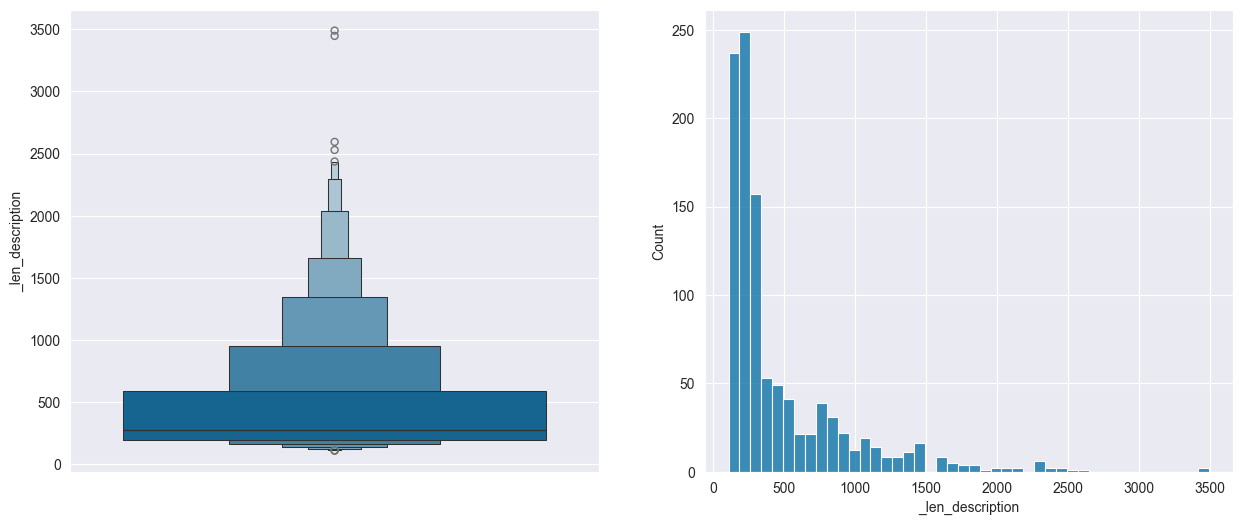

In [15]:
logger.info("EDA - Univariate Analysis - _len_description")
fig = plt.figure(figsize=(15,6))
plt.style.use( 'tableau-colorblind10')
ax1 = fig.add_subplot(121)
sns.boxenplot(data['_len_description'],ax=ax1)
ax2 = fig.add_subplot(122)
sns.histplot(data['_len_description'],ax=ax2)
plt.show()


In [14]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [11]:
data.describe()


,_len_description
count,1050.000000
mean,473.820952
std,457.910422
min,109.000000
25%,192.000000
50%,278.000000
75%,588.250000
max,3490.000000


#### Bivariate analysis

01/13/2024 16:10:30 - Preprocessing - INFO - Plotting _len_description distribution by category


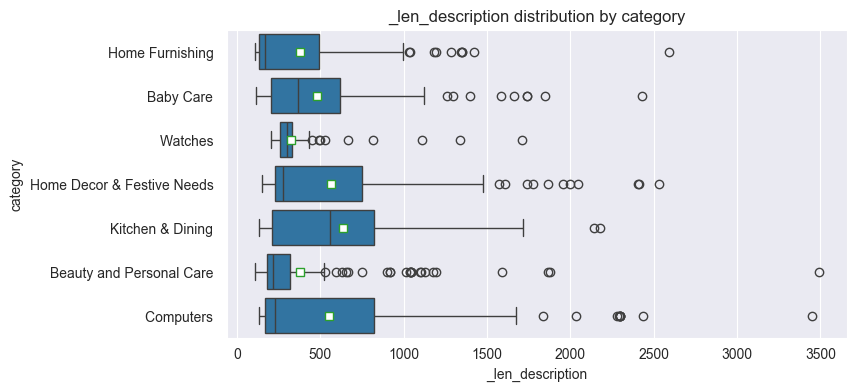

In [12]:
logger.info("Plotting _len_description distribution by category")
plt.figure(figsize=(8,4))
meanprops={ "marker" : "s", "markerfacecolor" : "w"}
sns.boxplot(x=data._len_description, y=data.category,showmeans=True, meanprops=meanprops,orient='h')
plt.title('_len_description distribution by category')
plt.show()


##### Correlation test -  ANOVA --> len x category

In [13]:
cor_test = preprocess.anova_test(data, '_len_description', ['category'])



ANOVA Table


,sum_sq,df,F,PR(>F)
category,1.203695e+07,6.0,10.063623,7.848605e-11
Residual,2.079194e+08,1043.0,NaN,NaN


----------------------------------------
p-value: 0.0
---------------------------------------- 

Reject H0. At least one variable has a significant effect on _len_description


In [14]:
logger.info("ANOVA test: _len_description and category are correlated")


01/13/2024 16:10:34 - Preprocessing - INFO - ANOVA test: _len_description and category are correlated


##### Outliers 

In [15]:
general_outliers = data[data['_len_description']>=2500]
display(general_outliers)
logger.info("{} visible outliers on boxplots  ".format(general_outliers.shape[0]))

percent_outliers = data[data['_len_description'].isin(preprocess.handle_outliers(data['_len_description'])[1])].sort_values(by='_len_description',ascending=False)
display(percent_outliers.head())
logger.info("{} outliers with percentiles method  - treshhold = 1.5 .".format(percent_outliers.shape[0]))


,description,category,_len_description
437,Key Features of HomeEdge Solid Wood King Bed K...,Beauty and Personal Care,3490
639,Key Features of Sunlast 16 inch Laptop Backpac...,Computers,3447
715,Pioneer Pragati Floral Single Duvet Orange (1 ...,Home Furnishing,2594
916,Key Features of wallskart Floral & Botanical W...,Home Decor & Festive Needs,2529


01/13/2024 16:10:36 - Preprocessing - INFO - 4 visible outliers on boxplots  


,description,category,_len_description
437,Key Features of HomeEdge Solid Wood King Bed K...,Beauty and Personal Care,3490
639,Key Features of Sunlast 16 inch Laptop Backpac...,Computers,3447
715,Pioneer Pragati Floral Single Duvet Orange (1 ...,Home Furnishing,2594
916,Key Features of wallskart Floral & Botanical W...,Home Decor & Festive Needs,2529
589,"Shopfloor.XYZ Vacuum Cleaner for Computers, La...",Computers,2436


01/13/2024 16:10:36 - Preprocessing - INFO - 85 outliers with percentiles method  - treshhold = 1.5 .


#### Frequent words 


In [16]:
raw_corpus = " ".join(data.description.values)

# clean_text is a custom function implemented in tools.py 
# -- > (tokenize, remove_stopwords, remove_punctuation, remove_numbers, remove_short_words, lemmatize, remove_extra_words)
clean_corpus = preprocess.clean_text(raw_corpus)
logger.info(f"raw_corpus_size : {len(raw_corpus)}  |  clean_corpus_size : {len(clean_corpus)}  |  unique_words_count : {len(set(clean_corpus))}")


01/13/2024 16:10:46 - Preprocessing - INFO - raw_corpus_size : 498561  |  clean_corpus_size : 50285  |  unique_words_count : 4293


In [17]:
tmp=pd.Series(clean_corpus).value_counts()

df_tmp =(pd.DataFrame()
         .assign(unique_words = tmp.tail(50).index, count_x1 = tmp.tail(50).values)
         .assign(x2_words = tmp[tmp==2][:50].index, count_x2 = tmp[tmp==2][:50].values)
         .assign(x3_words = tmp[tmp==3][:50].index, count_x3 = tmp[tmp==3][:50].values)
         .assign(most_frequent = tmp.index[:50], count_xx = tmp.values[:50])
         )
df_tmp


,unique_words,count_x1,x2_words,count_x2,x3_words,count_x3,most_frequent,count_xx
0,sonakshi,1,loomkart,2,mouth,3,free,618
1,pscychological,1,anjalika,2,waistband,3,buy,583
2,abstrcts,1,laddu,2,urban,3,products,577
3,illusions,1,gopal,2,filter,3,delivery,567
4,flawers,1,southeast,2,raga,3,genuine,564
5,husband,1,uplift,2,haat,3,shipping,564
6,merry,1,refresh,2,portia,3,cash,564
7,preferd,1,blades,2,burt,3,price,559
8,cats,1,australian,2,symbol,3,replacement,559
9,streched,1,nexus,2,romex,3,day,553


In [18]:
tmp.describe()


count    4293.000000
mean       11.713254
std        41.158294
min         1.000000
25%         1.000000
50%         2.000000
75%         6.000000
max       618.000000
Name: count, dtype: float64

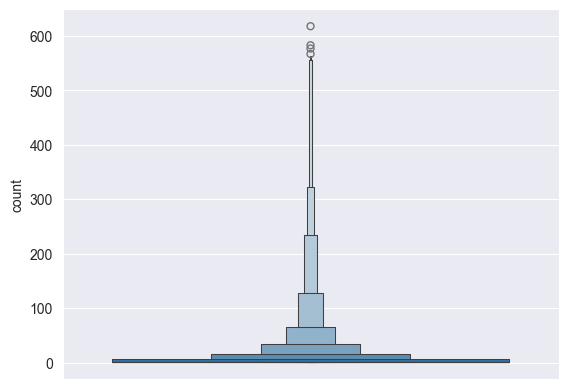

In [19]:
sns.boxenplot(tmp)
plt.show()


In [32]:
# Create a list of extra words to remove
extra_words = list(set(tmp[tmp==1].index))
logger.info("{} extra words added in extra list of words to remove.".format(len(extra_words)))


01/13/2024 16:17:25 - Preprocessing - INFO - 1253 extra words added in extra list of words to remove.


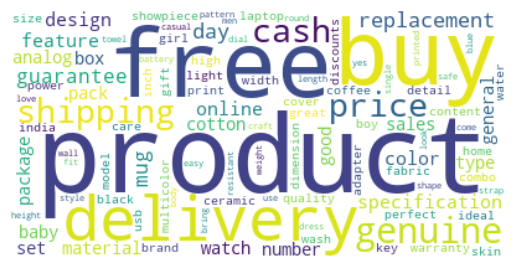

01/13/2024 16:17:30 - Preprocessing - INFO - raw_corpus_size : 498561  |  clean_corpus_size : 49032  |  unique_words_count : 3040


In [33]:
clean_corpus = preprocess.clean_text((raw_corpus),extra_words=extra_words)


plt.imshow(preprocess.get_wordcloud(clean_corpus) , interpolation='bilinear')
plt.axis("off")
plt.show()

logger.info(f"raw_corpus_size : {len(raw_corpus)}  |  clean_corpus_size : {len(clean_corpus)}  |  unique_words_count : {len(set(clean_corpus))}")


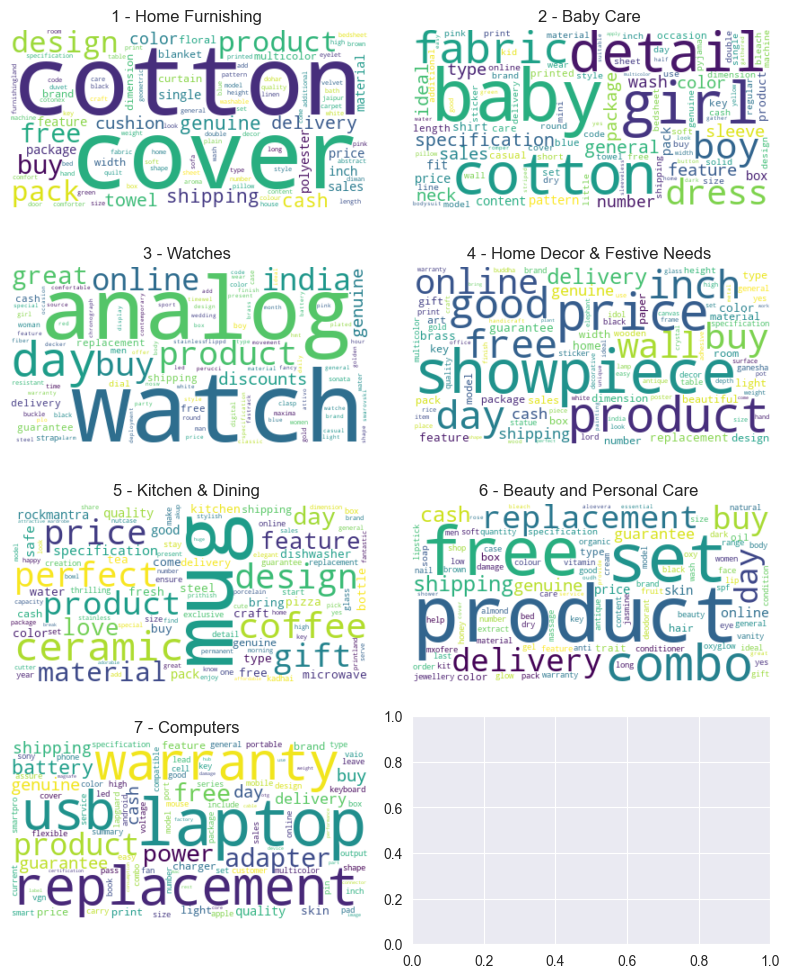

In [34]:
preprocess.viz_wordcloud_per_category(data, 'category', extra_words=extra_words)


#### Common words 

In [41]:
tmp[tmp==2]

loomkart     2
anjalika     2
laddu        2
gopal        2
southeast    2
            ..
focus        2
insurance    2
deluxe       2
shut         2
stroller     2
Name: count, Length: 972, dtype: int64

In [42]:
# List of common words to all categories simultaneously.
top_common_words = [word for word in tmp[tmp==2].index if preprocess.count_word_in_category(word, data, 'category')==len(data.category.unique())]

extra_words.extend(top_common_words)
logger.info(f"{len(top_common_words)} common words added in extra list of words to remove.")


01/13/2024 16:26:55 - Preprocessing - INFO - 21 common words added in extra list of words to remove.


In [46]:


# List of words common to at least 4 categories simultaneously.
most_frequent_common_words = [word for word in df_tmp['most_frequent'] if preprocess.count_word_in_category(word, data, 'category')>=3]
extra_words.extend(most_frequent_common_words)
logger.info(f"{len(most_frequent_common_words)} common words added in extra list of words to remove.")

extra_words = list(set(extra_words))
logger.info(f"Total extra words to remove : {len(extra_words)}")

01/13/2024 16:27:26 - Preprocessing - INFO - 46 common words added in extra list of words to remove.
01/13/2024 16:27:26 - Preprocessing - INFO - Total extra words to remove : 1324


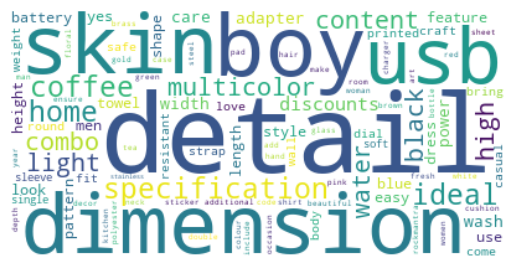

01/13/2024 16:27:34 - Preprocessing - INFO - raw_corpus_size : 498561  |  clean_corpus_size : 32547  |  unique_words_count : 2969


In [47]:
clean_corpus = preprocess.clean_text((raw_corpus), extra_words=extra_words)


plt.imshow(preprocess.get_wordcloud(clean_corpus) , interpolation='bilinear')
plt.axis("off")
plt.show()

logger.info(f"raw_corpus_size : {len(raw_corpus)}  |  clean_corpus_size : {len(clean_corpus)}  |  unique_words_count : {len(set(clean_corpus))}")


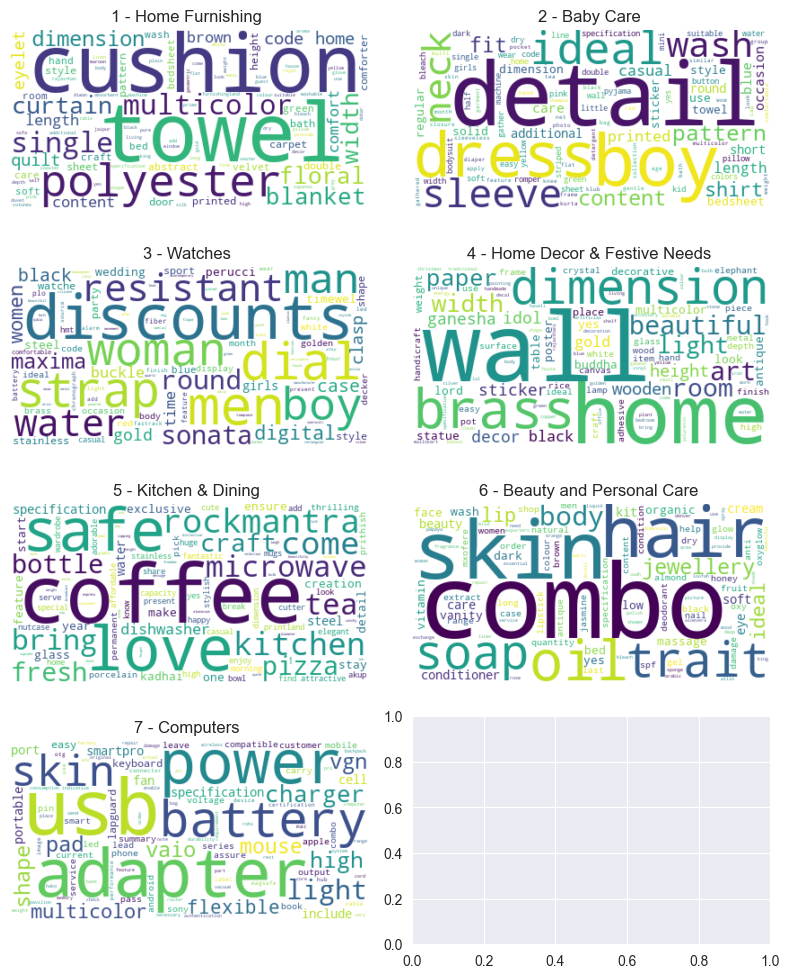

In [48]:
preprocess.viz_wordcloud_per_category(data, 'category', extra_words=extra_words)


In [49]:
data = data.assign(text=data.description.apply(lambda x: preprocess.clean_text(x, extra_words=extra_words, force_is_alpha=False)).apply(lambda x: " ".join(x)))
data['__len__text'] = data['text'].apply(lambda x: len(str(x)))
data.head()


,description,category,_len_description,text,__len__text
0,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,1420,elegance polyester multicolor abstract eyelet ...,770
1,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,444,specification sathiyas bath towel bath towel r...,248
2,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,1258,"eurospa terry face towel small height gsm 360,...",642
3,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,858,santosh royal fashion king double bedsheet roy...,510
4,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,1197,jaipur floral king double bedsheet 100 jaipur ...,625


01/13/2024 16:28:03 - Preprocessing - INFO - Plotting _len_description distribution by category


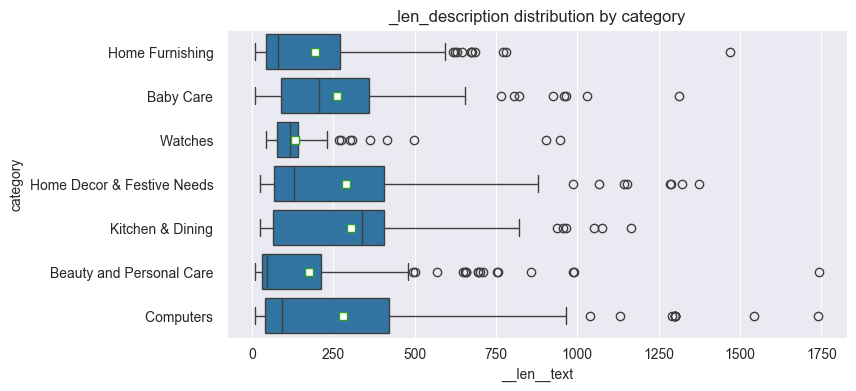

In [50]:
logger.info("Plotting _len_description distribution by category")
plt.figure(figsize=(8,4))
meanprops={ "marker" : "s", "markerfacecolor" : "w"}
sns.boxplot(x=data.__len__text, y=data.category,showmeans=True, meanprops=meanprops,orient='h')
plt.title('_len_description distribution by category')
plt.show()


01/13/2024 16:28:07 - Preprocessing - INFO - EDA - Univariate Analysis - __len__text


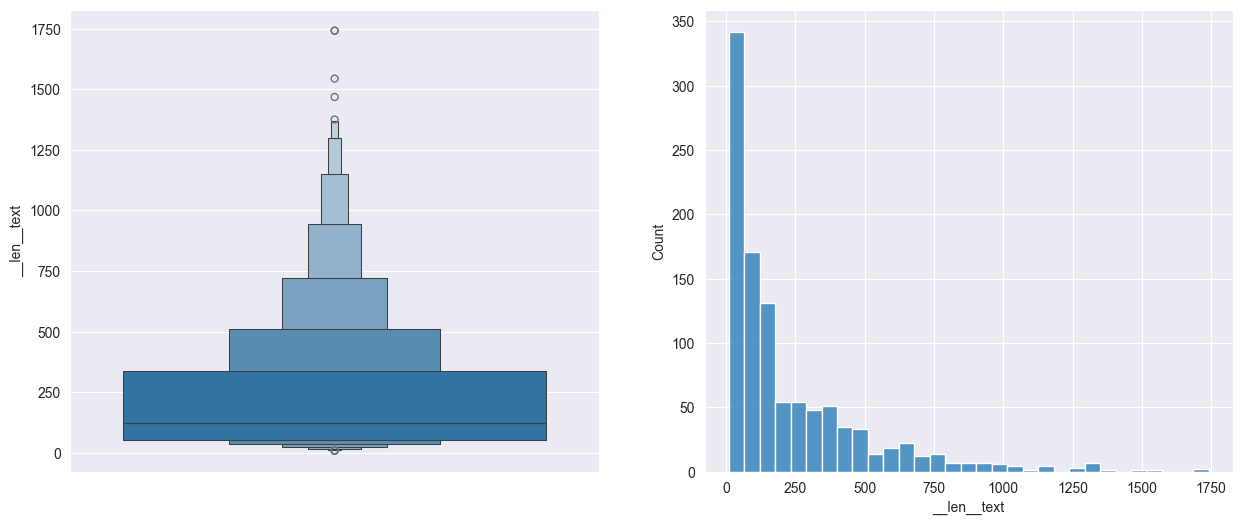

In [51]:
logger.info("EDA - Univariate Analysis - __len__text")
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
sns.boxenplot(data['__len__text'],ax=ax1)
ax2 = fig.add_subplot(122)
sns.histplot(data['__len__text'],ax=ax2)
plt.show()


In [52]:
# save cleanded data
data.to_csv("../data/cleaned_data.csv", index=False)
